# **UTS Data Mining 2022**
(Ken Zabiy Muhammad Arief - 21/479632/PTK/13966)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Input Data Set

df = pd.read_excel("AB_NYC_2019.xlsx")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **No 1 A - Data Pre Processing**

In [ ]:
#Checking Attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48869 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48873 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

Berdasarkan rangkuman informasi di atas, terdapat sejumlah data yang memiliki value yang tidak lengkap pada keseluruhan atribut. Pada kesempatn kali ini, saya hanya akan mencoba mengolah data dengan atribut yang lengkap pada semua atribut dengan asumsi bahwa data yang dapat diproses pada tahap selanjutnya hanya data yang lengkap.

In [ ]:
#Drop NA Value

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38810 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38810 non-null  int64         
 1   name                            38810 non-null  object        
 2   host_id                         38810 non-null  int64         
 3   host_name                       38810 non-null  object        
 4   neighbourhood_group             38810 non-null  object        
 5   neighbourhood                   38810 non-null  object        
 6   latitude                        38810 non-null  float64       
 7   longitude                       38810 non-null  float64       
 8   room_type                       38810 non-null  object        
 9   price                           38810 non-null  int64         
 10  minimum_nights                  38810 non-null  int64         
 11  nu

Setelah dibersihkan dari missing value, maka hanya terdapat sejumlah 38810 data yang dapat digunakan pada proses pengolahan data tahap selanjutnya.

Selanjutnya dilakukan pengecekan outlier terhadap data set. Pengecekan outlier ini diperlukan karena outlier dapat memengaruhi bentuk distribusi data yang dapat menyebabkan perubahan hasil pengujian statistik. 

Lalu, karena tujuan dari pengolahan data ini adalah untuk membangun model prediksi terhadap atribut price, maka untuk menyederhanakan proses hanya akan dilakukan pengecekan outlier terhadap atribut price saja.

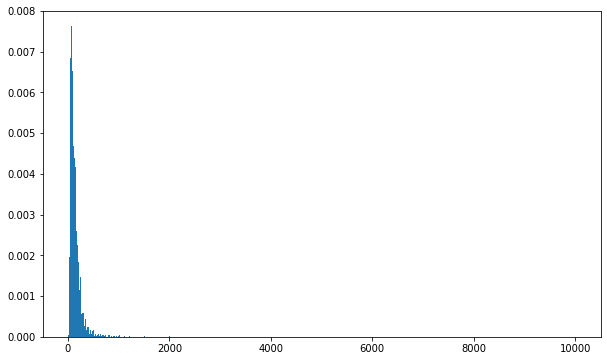

In [ ]:
#Outlier Detection

from scipy.stats import norm
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
plt.hist(df.price, bins = 500, density = True)
plt.show()

Berdasarkan histogram di atas, distribusi atribut price tidak tergolong distribusi normal. Sehingga untuk mengecek nilai outlier menggunakan metode Kuartil.

In [ ]:
#Quartile Creation

q1 = df[['price']].quantile(0.25, axis=0)
q2 = df[['price']].quantile(0.5, axis=0)
q3 = df[['price']].quantile(0.75, axis=0)
iqr = q3 - q1

In [ ]:
q1, q2, q3, iqr

(price    69.0
 Name: 0.25, dtype: float64, price    101.0
 Name: 0.5, dtype: float64, price    170.0
 Name: 0.75, dtype: float64, price    101.0
 dtype: float64)

In [ ]:
upper_limit = int(q3 + 1.5*iqr)
lower_limit = int(q1 - 1.5*iqr)

upper_limit, lower_limit

(321, -82)

In [ ]:
df_clean = df
df_clean['price'] = df['price'][(df['price']>lower_limit)&(df['price']<upper_limit)]

In [ ]:
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36731 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              36731 non-null  int64         
 1   name                            36731 non-null  object        
 2   host_id                         36731 non-null  int64         
 3   host_name                       36731 non-null  object        
 4   neighbourhood_group             36731 non-null  object        
 5   neighbourhood                   36731 non-null  object        
 6   latitude                        36731 non-null  float64       
 7   longitude                       36731 non-null  float64       
 8   room_type                       36731 non-null  object        
 9   price                           36731 non-null  float64       
 10  minimum_nights                  36731 non-null  int64         
 11  nu

Setelah dilakukan pembersihan outlier, maka jumlah data bersih yang dapat dianalisis lebih lanjut adalah sebanyak 36731 data yang semula berjumlah 48895 data. Artinya terdapat pengurangan jumlah data sebesar 23%.

# **NO 1 B - Predicting Price**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

Untuk menyusun model prediksi, tidak semua variabel harus digunakan. Maka berikut ini dipilih sejumlah variabel yang berpengaruh secara langsung terhadap variabel price.

In [ ]:
#New Dataframe for Prediction
df_predict = df_clean[['neighbourhood_group',	
                       'room_type',
                       'price',
                       'minimum_nights',
                       'calculated_host_listings_count',
                       'availability_365']].copy()

df_predict

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149.0,1,6,365
1,Manhattan,Entire home/apt,225.0,1,2,355
3,Brooklyn,Entire home/apt,89.0,1,1,194
4,Manhattan,Entire home/apt,80.0,10,1,0
5,Manhattan,Entire home/apt,200.0,3,1,129
...,...,...,...,...,...,...
48782,Manhattan,Private room,129.0,1,1,147
48790,Queens,Private room,45.0,1,6,339
48799,Staten Island,Private room,235.0,1,1,87
48805,Bronx,Entire home/apt,100.0,1,1,40


Karena salah satu variabel yaitu neighbourhood_group bersifat kategorikal, maka perlu dilakukan pemrosesan untuk mengubah data tersebut menjadi data numerik menggunakan metode faktorisasi data.

In [ ]:
def Encode(df_predict):
    for column in df_predict.columns[df_predict.columns.isin(['neighbourhood_group', 'room_type'])]:
        df_predict[column] = df_predict[column].factorize()[0]
    return df_predict

df_predict = Encode(df_predict.copy())

In [ ]:
df_predict.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149.0,1,6,365
1,1,1,225.0,1,2,355
3,0,1,89.0,1,1,194
4,1,1,80.0,10,1,0
5,1,1,200.0,3,1,129


Untuk memudahkan penggambaran hubungan antar variabel, maka dilakukan analisis korelasi dengan menggunakan bantuan grafik visualilsasi korelasi antar variabel sebagai berikut.

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

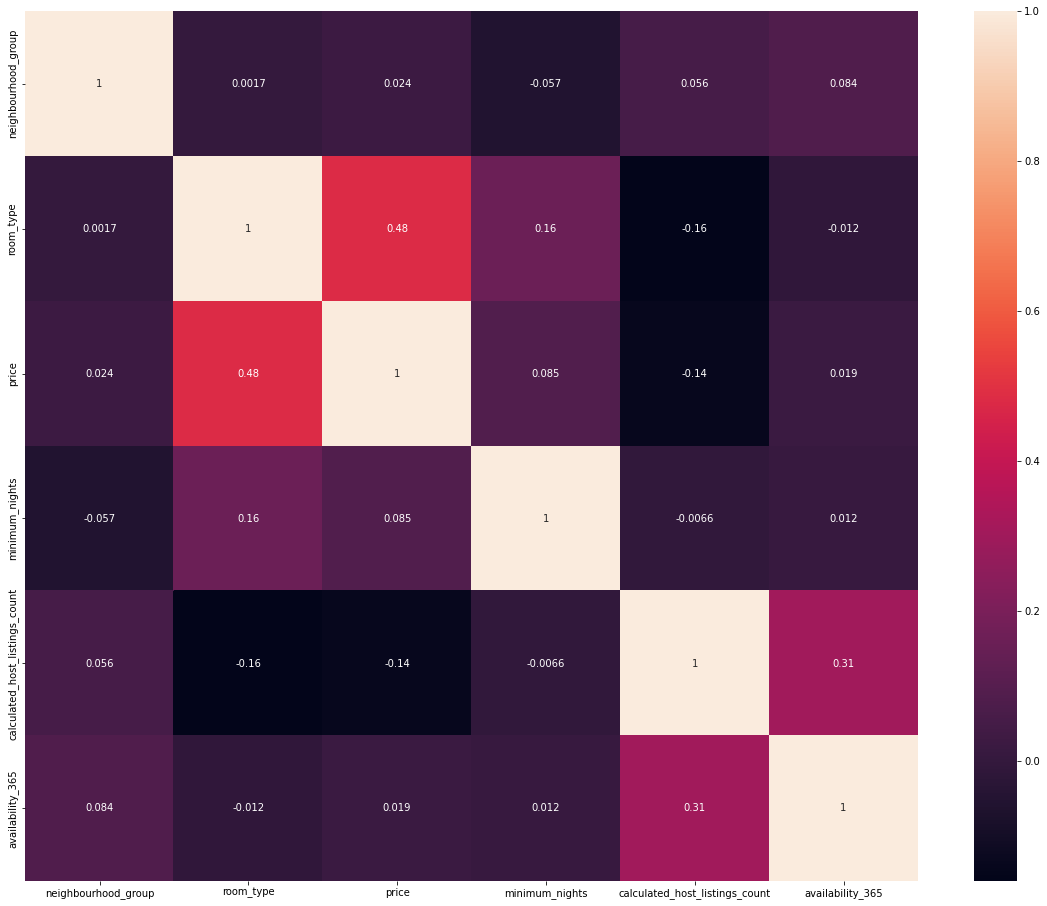

In [ ]:
corr = df_predict.corr(method='kendall')
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True)
df_predict.columns

Dare grafik di atas dapat diketahui bahwa variabel yang paling berkorelasi dengan variabel Price adalah variabel Room Type dengan nilai positif 0.48.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

Sebelum melakukan analisis prediksi, dataset harus dibagi menjadi bagian data train dan data test untuk meningkatkan akurasi model prediksi dan mencegah overfitting dan underfitting.

In [ ]:
#Defining Variables
x = df_predict[['neighbourhood_group',	
              'room_type',
              'minimum_nights',
              'calculated_host_listings_count',
              'availability_365']]
y = df_predict['price']

#Test & Train Set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

34087     50.0
45696    155.0
1552     150.0
40769    200.0
11232     50.0
Name: price, dtype: float64

In [ ]:
x_train.shape

(33057, 5)

Hasil analisis di atas menunjukkan bahwa pembagian dataset untuk train dan test sukses dan siap untuk diproses di analisis regresi.

# **No 1C - Model Performance**

Berikut ini dilakukan 2 jenis model prediksi yaitu:

1) Multiple Linear Regression Analysis

2) Decision Tree Regression Analysis

In [ ]:
#Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.2666734830515135

In [ ]:
print('MAPE: \n', mape (y_test,y_pred))
print('MSE: \n', mse (y_test,y_pred))

MAPE: 
 209265629696802.0
MSE: 
 3236.0648640244744


In [ ]:
#Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.4173868209571765

In [ ]:
print('MAPE: \n', mape (y_test,y_predict))
print('MSE: \n', mse (y_test,y_predict))

MAPE: 
 0.3468995435052033
MSE: 
 2433.767964452126


Berdasarkan perolehan analisis di atas, dari 3 faktor pembanding yaitu r2_score, MAPE, dan MSE, jenis model Decision Tree Regression memiliki tingkat akurasi yang lebih baik daripada Multiple Linear Regression. Oleh sebab itu, dipilih model Decision Tree Regression apabila hendak melakukan prediksi terhadap dataset AB_NYC_2019.xlsx

# **No 1D - Handling Missing Values Evaluation**

Terdapat berbagai metode untuk menangani Missing Values pada dataset. Pada dataset AB_NYC_2019.xlsx berikut, terdapat banyak variabel yang masing-masing variabel memiliki jenis data yang berbeda-beda. Maka untuk menyederhanakan proses handling Missing Values, hanya dilakukan penanganan dasar yaitu:

1. Penghapusan nilai sel yang kosong menggunakan dropna(), 
2. Penghapusan baris data yang tergolong outliers berdasarkan variabel price. Pemilihan variabel price dikarenakan target pengolahan data adalah untuk memprediksi nilai price. Sehingga fokus yang digunakan hanya pada variabel price. Penghapusan nilai outlier ini mengikuti bentuk distribusi variabel price ditinjau dari histogram variabel tersebut. Berdasarkan histogram yang ditampilkan, dapat disimpulkan bahwa bentuk distribusi variabel price tidak normal. Sehingga penghapusan outlier menggunakan metode quartil.

# **No 2 - Exploratory Data Analysis**

In [ ]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.673100e+04,3.673100e+04,36731.000000,36731.000000,36731.000000,36731.000000,36731.000000,36731.000000,36731.000000,36731.000000
mean,1.801731e+07,6.312264e+07,40.727806,-73.949881,117.329123,5.878087,29.730963,1.376583,4.843702,111.830307
std,1.063421e+07,7.479620e+07,0.055728,0.047007,65.038095,17.474144,48.720609,1.691149,24.413355,128.612660
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.704438e+06,7.016375e+06,40.688040,-73.981390,65.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.876796e+07,2.792319e+07,40.720780,-73.953710,100.000000,2.000000,10.000000,0.710000,1.000000,50.000000
75%,2.740448e+07,9.914783e+07,40.763325,-73.933235,150.000000,4.000000,34.000000,2.020000,2.000000,220.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,320.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Hasil statistik deskriptif di atas menunjukkan bahwa setiap variabel memiliki distribusi yang berbeda-beda. Dan dari rangkuman data tersebut juga belum bisa memberikan gambaran yang jelas tentang dataset yang ada. Sehingga untuk memperoleh insight lebih lanjut diperlukan Exploratory Data Analysis (EDA) yang lebih menyeluruh.

EDA pertama yang dilakukan adalah untuk menentukan 10 Host teratas yang memiliki properti terbanyak.

In [ ]:
#Host Ownership

top_host = df_clean.host_id.value_counts().head(10)
top_host

219517861    164
61391963      79
16098958      57
137358866     51
7503643       49
190921808     44
1475015       42
120762452     39
22541573      39
2119276       37
Name: host_id, dtype: int64

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('white')

In [ ]:
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Ownership_Count'}, inplace=True)
top_host_df

,Host_ID,Ownership_Count
0,219517861,164
1,61391963,79
2,16098958,57
3,137358866,51
4,7503643,49
5,190921808,44
6,1475015,42
7,120762452,39
8,22541573,39
9,2119276,37


[Text(0, 0, '1475015'),
 Text(0, 0, '2119276'),
 Text(0, 0, '7503643'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '61391963'),
 Text(0, 0, '120762452'),
 Text(0, 0, '137358866'),
 Text(0, 0, '190921808'),
 Text(0, 0, '219517861')]

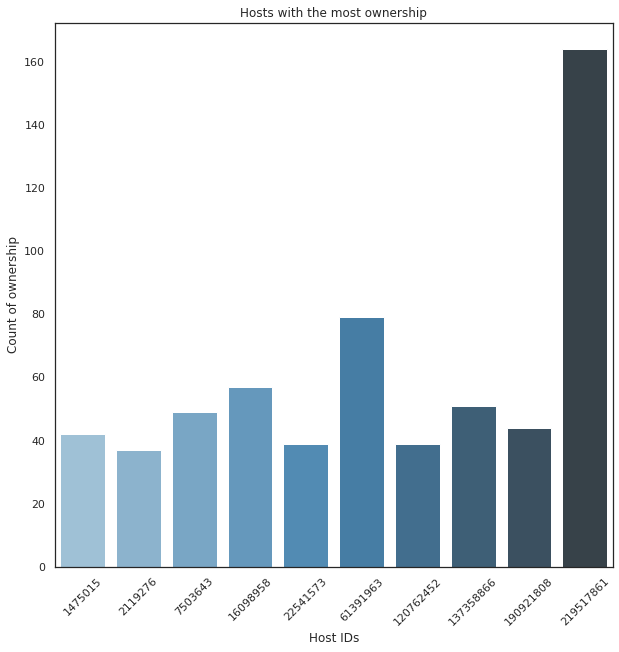

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="Ownership_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most ownership')
viz_1.set_ylabel('Count of ownership')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Berdasarkan grafik di atas, diketahui bahwa 10 Host dengan jumlah properti terbanyak berkisar antara 37 s.d. 164 per masing-masing Host. Dengan jumlah tertinggi dicapai oleh Host dengan ID 219517861 yaitu 164.

EDA kedua yang dilakukan adalah mengamati persebaran properti pada masing-masing Neighbourhood Group. Hal ini dapat menjadi petunjuk mengenai tingkat kepadatan properti persewaan AirBNB di masing-masing Neighbourhood Group.

In [ ]:
df_clean['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group')

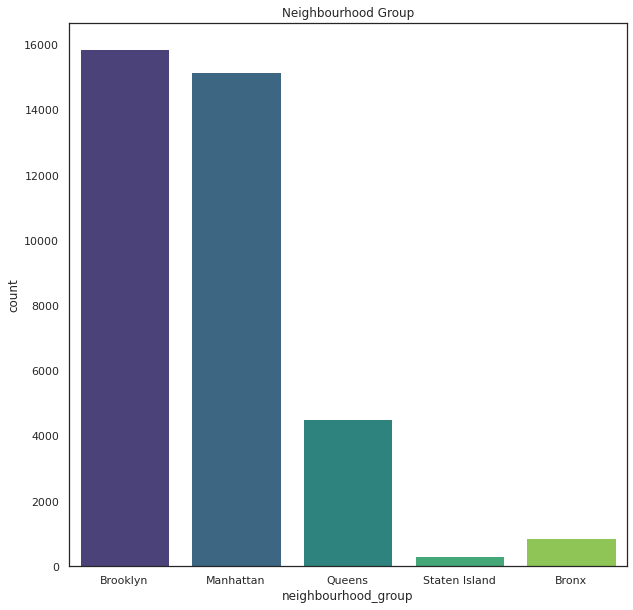

In [ ]:
sns.countplot(df_clean['neighbourhood_group'], palette="viridis")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Grafik di atas menunjukkan bahwa dari 5 Neighbourhood Group yang ada di New York, Brooklyn menempati posisi pertama dengan jumlah properti AirBNB terbanyak mencapai hampir 16000 unit. Sedangkan Neighbourhood Group dengan jumlah properti paling sedikit adalah Staten Island.

Selanjutnya, dilakukan analisis untuk mengetahui kuantitas properti untuk masing-masing jenis Room Type. Hal ini dilakukan untuk menginformasikan kepada calon pelanggan berapa banyak jenis properti yang tersedia untuk masing-masing Room Type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Room Type')

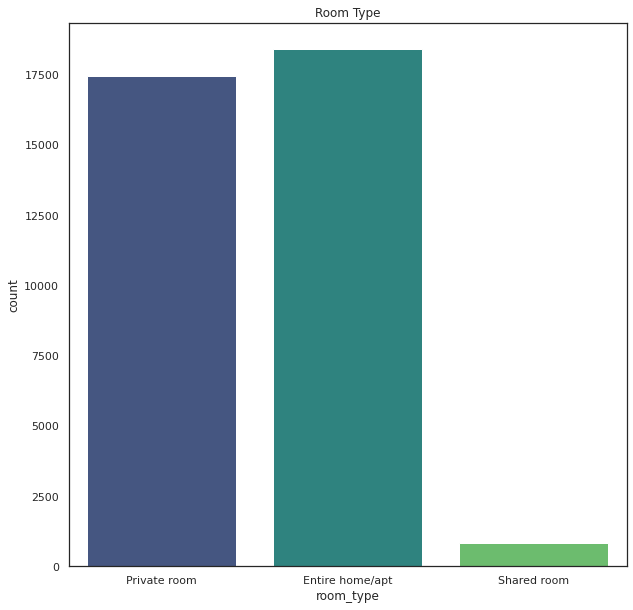

In [ ]:
sns.countplot(df_clean['room_type'], palette="viridis")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room Type')

Dari grafik di atas dapat diamati bahwa properti terbanyak adalah untuk jenis Entire Home/Apt yang berkisar lebih dari 17500. Kemudian disusul oleh jenis Private Room dengan selisih kurang lebih 500 unit. Dan terakhir adalah jenis Shared Room yang berkisar di nilai 1000 unit. Hal ini dapat menjadi acuan jenis Room Type yang populer di New York melalui paltform AirBNB. 

Untuk mengetahui peta persebaran properti AirBNB di New York, dapat dimanfaatkan data Longitude dan Latitude yang dikombinasikan dengan jenis data yang diperlukan.

Berikut ini adalah peta persebaran properti AirBNB berdasarkan Neighbourhood Group. Dapat diamati persebaran lokasi dan kepadatan yang bervariasi antar Neighbourhood Group satu dan yang lain.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


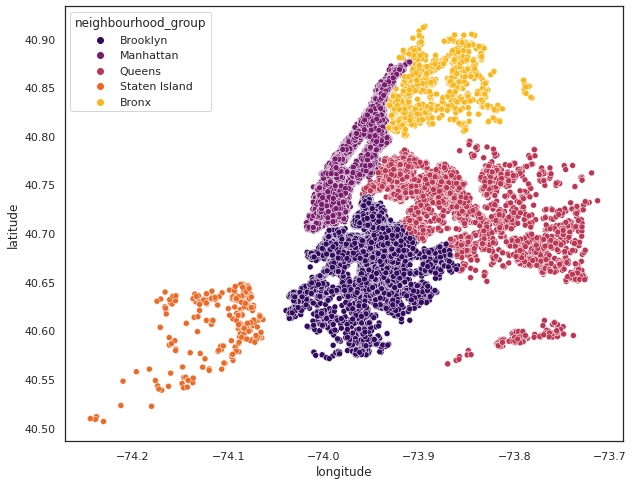

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_clean.longitude,df_clean.latitude,hue=df_clean.neighbourhood_group, palette='inferno')
plt.ioff()

Berikut ini adalah peta persebaran properti AirBNB berdasarkan Room Type. Dapat diamati bahwa persebaran setiap jenis Room Type cukup acak. Sehingga dapat disimpulkan bahwa di masing-masing Neighbourhood Group pasti memiliki setiap jenis Room Type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


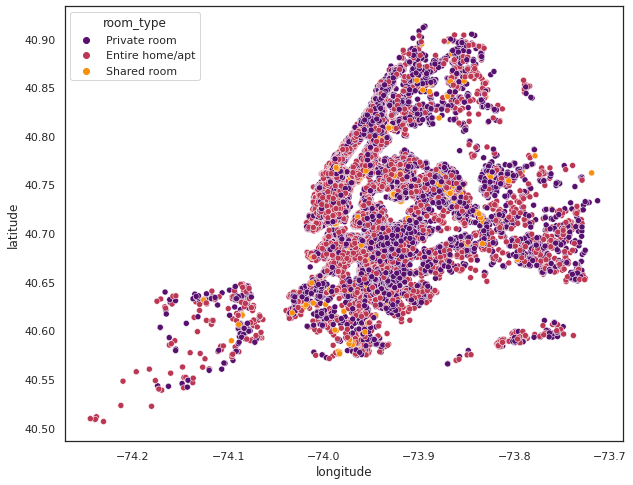

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_clean.longitude,df_clean.latitude,hue=df_clean.room_type, palette='inferno')
plt.ioff()

Berikut ini adalah peta persebaran properti AirBNB berdasarkan Price. Dapat diamati persebaran harga properti terpusat pada titik tertentu. Dan jika diamati lebih lanjut,  maka area pertemuan antara Neighbourhood Group Manhattan-Brooklyn-Queens cenderung tampak lebih tinggi daripada area lain. Hal ini menunjukkan bahwa area tersebut merupakan area yang tergolong mahal.

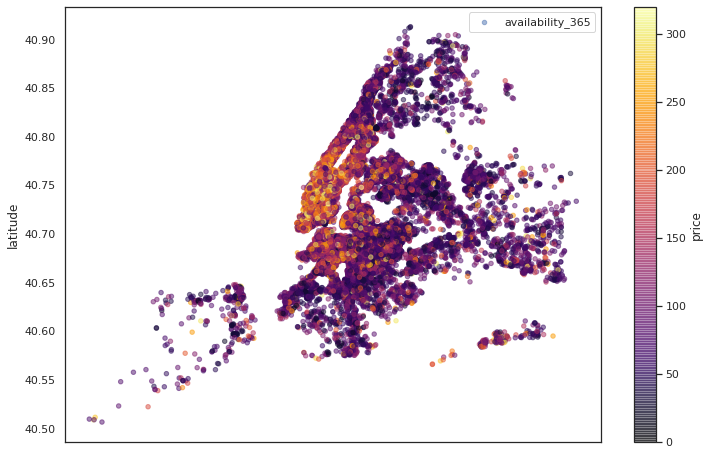

In [ ]:
price_scaled = df_clean[df_clean.price < 400]

g_map = price_scaled.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('inferno'), colorbar=True, alpha=0.5, figsize=(12,8))
g_map.legend()

# **Terima kasih**